In [ ]:
import pandas as pd
df=pd.read_csv("toyota.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


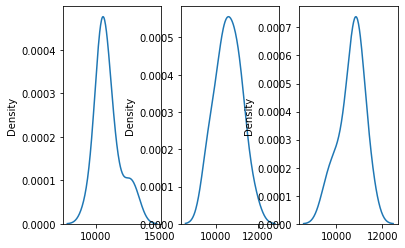

In [ ]:
import random as rd                                                 #Sample mean distribution of population.
import matplotlib.pyplot as plt                                     #We can observe central limit theorem. For n(sample size)=20,25,30       
import seaborn as sb                                                #From left to right, the curve becomes more normal                     
import numpy as np                                                  #Central Limit theorem states that for n>=25, the curve is approximately normal
l=[];l1=[];l2=[]
for i in range(20):
  l.append(np.mean(rd.sample(list(df['Price']),20)))
for i in range(20):
  l1.append(np.mean(rd.sample(list(df['Price']),25)))
for i in range(20):
  l2.append(np.mean(rd.sample(list(df['Price']),30)))
fig,s=plt.subplots(ncols=3)
sb.kdeplot(l,ax=s[0])
sb.kdeplot(l1,ax=s[1])
sb.kdeplot(l2,ax=s[2])
plt.show()

0.4254874651810585


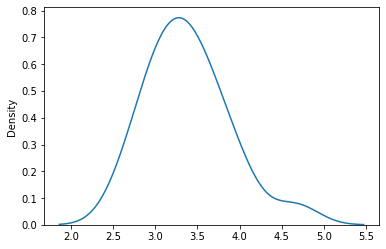

In [ ]:
l=[]                                                                  #Sample proportion distribution of population
print(len(df[df['Price']>10000]['Price'])/len(df['Price']))           #Consider the case where price>10000. The proportion of values of
for i in range(20):                                                   #price>10000 is .425. This is P. Thus proportion of price <=10000 is .575.This
  r=rd.sample(list(df['Price']),22)                                   #is Q. Now, for the sampling proportion dis. to be approx. normal, nPQ>5
  count=0                                                             #Thus n>20.525 i.e n>=21 is necessary. This is shown below.
  for j in r:
    if(j>10000):
      count+=1
  l.append(count)
for i in range(20):
  l[i]=l[i]/3
sb.kdeplot(l)
plt.show()

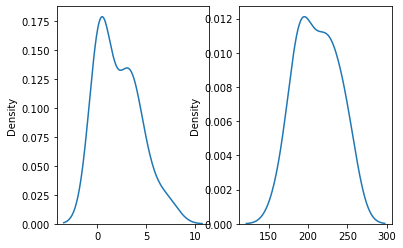

In [ ]:
import statistics as st                                               #Sample variance distribution.
l=[];l1=[]                                                            #Let s^2 denote variance and si denote standard deviation of population
s=st.pstdev(df['Price'])                                              #We notice that [(n-1)*s^2]/si^2 follows a Chi Square distribution, shown 
for i in range(20):                                                   #by the first figure. It is characterized by a high value of 
  r=st.variance(rd.sample(list(df['Price']),3))                       #probability density at s^2=0.
  r=(r*2)/(s*s)                                                       #As n increases, the curve normalizes. The second figure shows an 
  l.append(r)                                                         #approximately normal curve.(1st figure n=3, 2nd figure n=200)
for i in range(20):
  r=st.variance(rd.sample(list(df['Price']),200))
  r=(r*199)/(s*s)
  l1.append(r)
fig,s=plt.subplots(ncols=2)
sb.kdeplot(l,ax=s[0])
sb.kdeplot(l1,ax=s[1])
plt.show()

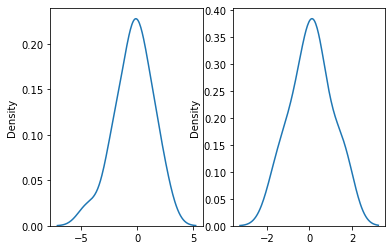

In [ ]:
l=[];l1=[]                                                                      #Let mu be the population mean
mu=df['Price'].mean()                                                           #s be the standard deviation of a sample of the mean                                                                                  
for i in range(20):                                                             #x be the sample mean
  sample=rd.sample(list(df['Price']),3)                                         #Here t= (x-mu)/(s/sqrt(n))
  s=st.stdev(sample)                                                            #A probability distribution of this variable yields a t distribution for small values of n
  x=st.mean(sample)                                                             #A t distribution is similar to a normal dsitribution the difference being that it has fatter tails
  t=(x-mu)/(s/(3**.5))                                                          #compared to normal curves.
  l.append(t)                                                                   #As n increases the distribution becomes closer to a standard normal distribution(mu=0 
for i in range(20):                                                             # and standard deviation=1). 
  sample=rd.sample(list(df['Price']),300)                                       #(1st figure n=3, 2nd figure n=300)
  s=st.stdev(sample)
  x=st.mean(sample)
  t=(x-mu)/(s/(300**.5))                                                       
  l1.append(t)
fig,s=plt.subplots(ncols=2)
sb.kdeplot(l,ax=s[0])
sb.kdeplot(l1,ax=s[1])
plt.show()       